In [45]:
import pandas as pd

In [46]:


binning= pd.read_table("../DiarrheaExample/SRS1992958/Corrected_bins/binning_no_multiedges.tsv", index_col=0,header=None)
binning.columns= ["Bin"]

binning.head()

,Bin
0,
NODE_1_length_426476_cov_20.919868,SRS1992958_vamb_370
NODE_2_length_382687_cov_21.297419,SRS1992958_vamb_370
NODE_3_length_335529_cov_199.766027,SRS1992958_vamb_615
NODE_4_length_313833_cov_39.907030,SRS1992958_vamb_2394
NODE_5_length_246210_cov_27.986541,SRS1992958_vamb_370


In [47]:
# Find nodes with multiple assingments

multiple_assignments= []

with open("../DiarrheaExample/SRS1992958/Corrected_bins/binning.tsv") as f:
    for line in f:
        elements= line.split("\t")
        if len(elements) > 2:
            multiple_assignments.append(elements[0])

print(f"Found {len(multiple_assignments)} nodes with multiple assignments")


binning.loc[multiple_assignments,"Bin"]= "multiple"

Found 219 nodes with multiple assignments


In [48]:
# colors

scafold_colors= pd.Series(index=['SRS1992958_vamb_370', 'SRS1992958_vamb_615',
       'SRS1992958_vamb_2394', 'SRS1992958_vamb_664',
       'SRS1992958_vamb_1046', 'SRS1992958_vamb_18', 'SRS1992958_vamb_20',"multiple"],
       data=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0',"darkblue"],
       name="Color")
#.fillna("grey")

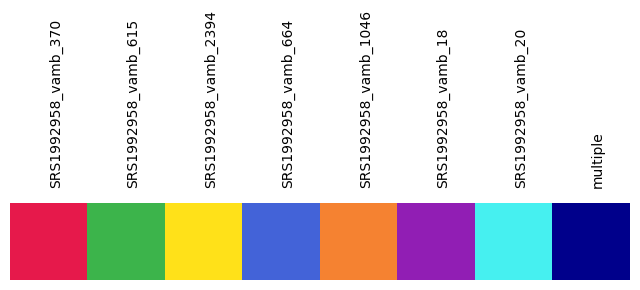

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.palplot(scafold_colors)

ax=plt.gca()


for i, name in enumerate(scafold_colors.index):
    ax.text(i, -0.7, name,rotation=90,ha="left",va="bottom")

ax.set_axis_off()

plt.savefig("../Tutorial/images/Graph_legend.png",dpi=300,bbox_inches="tight")

In [49]:
# map nodes to scaffolds
scafold="undefined"

node_mapping= {}
with open("../DiarrheaExample/SRS1992958/assembly/scaffolds.paths") as f:
    for line in f:
        if line.startswith("NODE"):
            scafold=line.strip().strip("'")
        else:
            nodes=line.strip().strip(";").replace("+","").replace("-","").split(",")

            for n in nodes:
                node_mapping[n]=scafold
            

node_info= pd.Series(node_mapping).to_frame()
node_info.columns=["Scaffold"]



In [50]:

node_info= node_info.join(binning, on="Scaffold").join(scafold_colors,on="Bin").fillna("grey")

In [42]:
node_info.to_csv("../DiarrheaExample/SRS1992958/Corrected_bins/node_info.csv")

In [74]:
nodes_of_interest= node_info.query("Bin=='SRS1992958_vamb_2394' | Bin=='SRS1992958_vamb_615'").index

",".join(nodes_of_interest)

'9018,163172,1807187,28529,180558,3943513,2466253,353108,1202416,21725,179942,11776,847730,30787,21273,70822,25947,820400,3896479,786810,32149,1287056,27013,31399,70482,23653,28835,19677,4010918,2306881,2254633,2452143,22915,2235,30459,27457,17852,531500,9956,41527,59483,3134939,252813,2213701,428385,3837336,18771,576045,127996,64638,64644,64650,64656,64662,64668,1284270,7055,26543,17752,26512,26498,1285,759887,25815,2496227,3574768,2970549,68736,3050019,29999,68432,1276473,107709,3877278,3877270,3877264,31999,1272118,21779,12395,1272162,1272168,1272174,1274374,12353,9132,246147,362415,64676,1274659,1274665,1274671,32161,14660,63408,3790741,1561743,3978287,33317,2666419,69476,3091001,3935537,2098863,1470638,1470632,21835,14139,24014,6638,3398059,23837,5015,68662,462360,232604,24041,3874724,3874718,1589963,68748,685356,1224916,39729,75506,19507,1276362,1276356,1276350,1276344,1275860,1275866,15473,3939129,69204,18473,3865611,973771,3996549,64494,24730,1824740,4741,20677,601691,3790848,6

In [ ]:
115, 257, 269, 575, 815, 843, 923, 937, 949, 1037, 1064, 1070, 1101, 1130, 1188, 1225, 1249, 1285, 1484, 1509, 1542, 1575, 1668, 2052, 2235, 2270, 2788, 2825, 2834, 3250, 3252, 4224, 4226, 4230, 4254, 4306, 4741, 4753, 4771, 4787, 4857, 4871, 4932, 4967, 5015, 5047, 5067, 5115, 5153, 5187, 5201, 5480, 5497, 5666, 5730, 5958, 6056, 6081, 6204, 6236, 6262, 6351, 6508, 6525, 6638, 6726, 6780, 6872, 6986, 7055, 7082, 7086, 7522, 7748, 7836, 7912, 8076, 8251, 8253, 8600, 8640, 8717, 8824, 8842, 8844, 9018, 9046, 9048, 9132, 9217, 9220, 9350, 9406, 9538, 9950, 9952, 9956, 9982, 9988, 10476, 10512, 10844, 10884, 10886, 11018, 11086, 11088, 11182, 11328, 11448, 11558, 11746, 11776, 11853, 11857, 11861, 11971, 11995, 12005, 12009, 12111, 12209, 12211, 12233, 12245, 12353, 12361, 12395, 12400, 12425, 12563, 12565, 12623, 12833, 12959, 12989, 13041, 13047, 13093, 13143, 13203, 13205, 13299, 13375, 13409, 13595, 13691, 13847, 14139, 14161, 14163, 14239, 14291, 14465, 14660, 14799, 14801, 14945, 14974, 15169, 15173, 15263, 15265, 15379, 15473, 15524, 15573, 15575, 15597, 15663, 15675, 15723, 15725, 15753, 15755, 15803, 15917, 15919, 16110, 16217, 16475, 16479, 16481, 16581, 16583, 16769, 16807, 17135, 17137, 17153, 17161, 17229, 17231, 17309, 17311, 17357, 17477, 17541, 17593, 17723, 17740, 17752, 17852, 17889, 18097, 18099, 18271, 18465, 18473, 18611, 18613, 18678, 18745, 18769, 18771, 18847, 18862, 18865, 18937, 19093, 19131, 19134, 19162, 19185, 19199, 19371, 19499, 19503, 19507, 19551, 19599, 19637, 19677, 19745, 19773, 19785, 19830, 19938, 19989, 20179, 20181, 20185, 20205, 20349, 20353, 20357, 20369, 20419, 20421, 20425, 20435, 20465, 20477, 20547, 20565, 20577, 20583, 20677, 20715, 20739, 20741, 20834, 20949, 20977, 21013, 21177, 21273, 21329, 21365, 21367, 21445, 21479, 21537, 21539, 21689, 21703, 21725, 21751, 21777, 21779, 21835, 21837, 21925, 21941, 21945, 21947, 21973, 22013, 22029, 22065, 22069, 22083, 22173, 22243, 22435, 22643, 22683, 22685, 22689, 22691, 22809, 22915, 22993, 23013, 23167, 23191, 23195, 23357, 23415, 23435, 23452, 23527, 23555, 23587, 23589, 23591, 23629, 23653, 23695, 23697, 23787, 23789, 23805, 23831, 23837, 23873, 23907, 23941, 23975, 24014, 24027, 24033, 24041, 24135, 24289, 24361, 24519, 24681, 24712, 24730, 24734, 24821, 25025, 25235, 25397, 25565, 25745, 25789, 25809, 25813, 25815, 25849, 25947, 26257, 26259, 26261, 26403, 26407, 26449, 26498, 26512, 26525, 26543, 26989, 27005, 27013, 27235, 27457, 27671, 27823, 28007, 28071, 28083, 28091, 28097, 28105, 28125, 28169, 28185, 28241, 28331, 28333, 28403, 28529, 28577, 28651, 28719, 28755, 28835, 29101, 29219, 29283, 29425, 29689, 29725, 29747, 29767, 29969, 29999, 30085, 30133, 30233, 30375, 30445, 30459, 30539, 30645, 30661, 30787, 30855, 30983, 31008, 31025, 31053, 31071, 31263, 31289, 31311, 31397, 31399, 31659, 31679, 31825, 31999, 32013, 32057, 32073, 32149, 32161, 32199, 32247, 32285, 32317, 32437, 32543, 32625, 32659, 32683, 32715, 32767, 32869, 32901, 33015, 33139, 33187, 33193, 33241, 33253, 33265, 33277, 33285, 33317, 33329, 33343, 33357, 33439, 33985, 36305, 37610, 38331, 38527, 39729, 39735, 39741, 40122, 40456, 40648, 41065, 41216, 41515, 41525, 41527, 41626, 42994, 45356, 45698, 45722, 45726, 45728, 46133, 46337, 47447, 47470, 50754, 51287, 51635, 52297, 52796, 52974, 53566, 53834, 53971, 53977, 53983, 55091, 55949, 58563, 58631, 58633, 59147, 59483, 59635, 60507, 60864, 62799, 62831, 62903, 62931, 62983, 63091, 63095, 63153, 63177, 63245, 63287, 63303, 63341, 63389, 63396, 63398, 63400, 63408, 63420, 63426, 63452, 63468, 64061, 64494, 64500, 64506, 64512, 64520, 64526, 64532, 64538, 64544, 64550, 64556, 64562, 64568, 64574, 64580, 64586, 64592, 64598, 64606, 64612, 64620, 64626, 64632, 64638, 64644, 64650, 64656, 64662, 64668, 64672, 64676, 65104, 65106, 65374, 65438, 65462, 65468, 65474, 65478, 65480, 67100, 67102, 67154, 67162, 67168, 67170, 67172, 67186, 67192, 67264, 67818, 67820, 68206, 68208, 68402, 68408, 68414, 68432, 68438, 68492, 68504, 68516, 68530, 68536, 68546, 68596, 68600, 68602, 68608, 68614, 68656, 68662, 68670, 68676, 68694, 68706, 68718, 68736, 68748, 69154, 69192, 69198, 69204, 69210, 69258, 69420, 69428, 69440, 69456, 69476, 69482, 69528, 69546, 69570, 69576, 69636, 69642, 69660, 69672, 69744, 69860, 69874, 69880, 69886, 69934, 70000, 70006, 70260, 70342, 70354, 70398, 70410, 70440, 70472, 70482, 70494, 70500, 70532, 70538, 70558, 70564, 70590, 70596, 70634, 70668, 70670, 70688, 70694, 70702, 70708, 70734, 70758, 70776, 70780, 70798, 70816, 70822, 70880, 70916, 71736, 71740, 72080, 72706, 73520, 73643, 75286, 75506, 75512, 75518, 77340, 78463, 78570, 78870, 79228, 79236, 79242, 79248, 79252, 79254, 79260, 81152, 83598, 86184, 88533, 90321, 91477, 92807, 97581, 100172, 100866, 104224, 107057, 107709, 107764, 113969, 117463, 119289, 119295, 119575, 120071, 121778, 124358, 125910, 127996, 149428, 158410, 158416, 158850, 160943, 163172, 165318, 169254, 169260, 178197, 179534, 179556, 179682, 179848, 179898, 179900, 179942, 180162, 180168, 180174, 180184, 180558, 180810, 181196, 181202, 181386, 181388, 181574, 181576, 181578, 181890, 181914, 182038, 182472, 182474, 183514, 183516, 183834, 183863, 216169, 216175, 216181, 227228, 232604, 233520, 235667, 236049, 246147, 252813, 273765, 275399, 304760, 340721, 344599, 346233, 353108, 362415, 369900, 376357, 376892, 408081, 411207, 424671, 428385, 462354, 462360, 462366, 465387, 484288, 492379, 517626, 531500, 561415, 561419, 567778, 576045, 580999, 595913, 601691, 624131, 659140, 660954, 667878, 667884, 667890, 667902, 679992, 685356, 703332, 704755, 706328, 706513, 706754, 716456, 724972, 728185, 735153, 736338, 744939, 759887, 762690, 762696, 764232, 764234, 780610, 786810, 789525, 804174, 804178, 806897, 806903, 820400, 826405, 831059, 838287, 840295, 847730, 862461, 862465, 880059, 889616, 902961, 905786, 905792, 910749, 910756, 910762, 913598, 915371, 920896, 949539, 956109, 965635, 973771, 973967, 1007689, 1009086, 1025033, 1048285, 1126961, 1151236, 1152449, 1168875, 1198587, 1202416, 1203499, 1224916, 1245313, 1262260, 1268113, 1272112, 1272118, 1272150, 1272156, 1272162, 1272168, 1272174, 1274374, 1274380, 1274386, 1274445, 1274659, 1274665, 1274671, 1274677, 1274683, 1274689, 1274695, 1274701, 1274707, 1274713, 1274719, 1274725, 1274731, 1274759, 1274777, 1274783, 1274787, 1274807, 1275168, 1275460, 1275490, 1275516, 1275522, 1275860, 1275866, 1276344, 1276350, 1276356, 1276362, 1276386, 1276473, 1276826, 1281900, 1283648, 1284110, 1284270, 1284300, 1285160, 1285162, 1285224, 1285557, 1285573, 1285717, 1285803, 1286476, 1286480, 1287056, 1287058, 1287158, 1287481, 1287819, 1287821, 1287855, 1288005, 1288231, 1288619, 1288623, 1288625, 1290053, 1291037, 1291039, 1291315, 1291617, 1291619, 1292059, 1292890, 1292952, 1293004, 1293539, 1293541, 1294510, 1295144, 1295210, 1297006, 1298148, 1307820, 1339519, 1342047, 1361797, 1366901, 1375963, 1375969, 1375975, 1375981, 1375987, 1375993, 1376173, 1378313, 1378319, 1388729, 1390359, 1431115, 1431147, 1451725, 1469317, 1470632, 1470638, 1470656, 1470662, 1483445, 1490337, 1520923, 1521151, 1556919, 1561632, 1561743, 1589963, 1591727, 1600201, 1600203, 1633567, 1640353, 1665393, 1683550, 1685127, 1706679, 1719625, 1728217, 1729805, 1742854, 1777033, 1807187, 1824740, 1831787, 1873003, 1874811, 1889159, 1916989, 1950403, 1957069, 1992379, 1994669, 1997405, 2000253, 2009017, 2098863, 2099815, 2123231, 2149117, 2171921, 2207719, 2213701, 2242411, 2254633, 2260591, 2264327, 2265063, 2278807, 2278999, 2284611, 2285461, 2294381, 2298297, 2298299, 2306881, 2313673, 2353325, 2386797, 2394033, 2414847, 2435574, 2440507, 2440511, 2448919, 2448921, 2449217, 2451073, 2452143, 2462597, 2466253, 2467833, 2473265, 2476081, 2476083, 2491032, 2496227, 2501672, 2503225, 2511150, 2513412, 2513419, 2513425, 2513445, 2553765, 2588845, 2596149, 2598181, 2624622, 2631029, 2653141, 2658269, 2662859, 2666419, 2688421, 2699836, 2700547, 2748923, 2809381, 2847150, 2860337, 2891740, 2893135, 2898492, 2898498, 2898544, 2912927, 2923066, 2932228, 2937235, 2947739, 2970316, 2970322, 2970328, 2970334, 2970338, 2970549, 2986057, 3018408, 3050019, 3050335, 3055247, 3058777, 3059897, 3066888, 3079411, 3079437, 3080091, 3080100, 3090272, 3091001, 3091005, 3094472, 3094480, 3098795, 3101109, 3108372, 3113665, 3134939, 3155050, 3162007, 3189998, 3210385, 3215740, 3230315, 3237064, 3279107, 3306449, 3323466, 3350753, 3355867, 3358522, 3365005, 3375837, 3378779, 3381795, 3398057, 3398059, 3402159, 3430330, 3448148, 3454310, 3455815, 3455819, 3457575, 3458167, 3461820, 3462058, 3464094, 3464810, 3471742, 3491065, 3497998, 3500160, 3500844, 3500852, 3500858, 3500864, 3500872, 3500880, 3500886, 3500892, 3508852, 3510697, 3514549, 3516628, 3516677, 3519521, 3519739, 3521011, 3522763, 3523403, 3535243, 3536477, 3540903, 3544366, 3546367, 3552497, 3561237, 3574768, 3619481, 3621985, 3640337, 3652215, 3653341, 3656250, 3667815, 3673918, 3680672, 3681601, 3689154, 3697489, 3698353, 3699595, 3704048, 3704986, 3705442, 3707180, 3708046, 3718407, 3722714, 3727295, 3733868, 3743079, 3743950, 3747368, 3761266, 3772080, 3772908, 3775530, 3776717, 3790741, 3790816, 3790848, 3793393, 3798985, 3806101, 3808725, 3810469, 3814057, 3816254, 3821998, 3824296, 3832440, 3832706, 3836610, 3837336, 3839918, 3842906, 3843686, 3845153, 3845155, 3865611, 3866403, 3868765, 3868767, 3872566, 3872714, 3873340, 3873752, 3874718, 3874724, 3874732, 3874736, 3874783, 3874787, 3875212, 3875496, 3875506, 3877264, 3877270, 3877278, 3877286, 3877316, 3877582, 3877588, 3878129, 3878138, 3878310, 3878316, 3878378, 3878802, 3879264, 3879866, 3879894, 3880056, 3880068, 3880720, 3880930, 3891370, 3891416, 3893176, 3894836, 3896277, 3896479, 3896517, 3897763, 3898997, 3901593, 3903651, 3906077, 3910897, 3913173, 3917155, 3922843, 3922845, 3925856, 3928720, 3932378, 3935537, 3937553, 3938851, 3939129, 3939131, 3941897, 3942865, 3943453, 3943513, 3945901, 3947941, 3950275, 3951441, 3951965, 3954456, 3955987, 3956047, 3956073, 3958576, 3959286, 3960642, 3961032, 3961402, 3964329, 3966948, 3967251, 3969780, 3969982, 3970398, 3970752, 3971214, 3972268, 3972272, 3972416, 3973264, 3974757, 3975434, 3976158, 3976705, 3978088, 3978287, 3979844, 3980083, 3981521, 3982063, 3982067, 3984809, 3984811, 3985307, 3985309, 3985721, 3985921, 3985923, 3987793, 3987795, 3988869, 3989217, 3989307, 3989970, 3990359, 3990511, 3991284, 3991290, 3991436, 3991724, 3992120, 3993045, 3995549, 3996549, 3996615, 3996617, 3997427, 3997429, 3997813, 3998710, 3998817, 3999602, 4000289, 4000749, 4000827, 4001015, 4001287, 4004283, 4004799, 4008311, 4008313, 4008707, 4009424, 4010368, 4010918, 4013121, 4013847, 4015709, 4016055, 4016522, 4016747, 4017112, 4019395, 4020365, 4020819, 4023348, 4025431, 4025437, 4027009

In [43]:
scafold_info.query("Name=='SRS1992958_88'").head()

,Scaffold,Name,Bin,Color
68250,NODE_89_length_46282_cov_7863.197006,SRS1992958_88,SRS1992958_vamb_370,#e6194b


In [44]:
",".join(node_info.query("Bin=='SRS1992958_vamb_615'").index)

'9018,163172,1807187,28529,180558,3943513,2466253,353108,1202416,21725,179942,11776,847730,30787,21273,70822,25947,820400,3896479,786810,32149,1287056,27013,31399,23653,28835,19677,4010918,2306881,2254633,2452143,22915,30459,27457,17852,531500,9956,576045,2496227,3574768,2970549,246147,5015,973771,3839918,37610,92807,23013,23527,124358,41216,18465,5666,3891416,23195,3497998,3970398,3928720,113969,33285,4000289,21013,3461820,30983,3252,1361797,3250,8251,8253,32683,29767,3561237,30855,4025437,13047,3066888,780610,3951965,1291315,27005,17153,5047,31071,22065,3727295,2394033,3640337,4019395,3992120,2242411,13203,4010368,7522,30233,20425,1070,2435574,2448919,2448921,19773,28083,19131,31053,3987795,3704986,1742854,3891370,11746,5201,14801,22809,1729805,1152449,33277,14239,1281900,16583,3772080,1285160,3996615,32013,17137,5730,19371,4000749,182474,182472,3947941,70880,181202,181196,2937235,3990511,70694,70688,67100,22173,2932228,2511150,3880720,23831,3922843,58633,12361,3984809,65462,179534,1

Workflow with


Install Bandage https://rrwick.github.io/Bandage/

Bandage is a GUI software to visualize assembly graphs. 


Load the graph in `SRS1992958/assembly/`

Click on draw graph.
Color nodes by depth.


Do you see some exeptional nodes?

Answer: Circular nodes.

Click on them, and chack the coverage information. 



I prepared a mapping file from graph nodes to contigs to the binds.
Import node info

Click on open CSV and choose the file `SRS1992958/assembly/Node_info.csv`


The coloring should change according to the bins. 

Deactivate any node labeling (There are too many labels).


Does the colorig make sense? 
What about the purple nodes?
What are the colors of the circular nodes?


What is the Contig name of the most abundant circular node?

Answer: SRS1992958_88


Let's see what it is?

`filterbyname.sh in="SRS1992958_contigs.fasta" names=SRS1992958_88 out=SRS1992958_88.fasta ow include`

This creates a fasta file with only this node. 

`sendsketch.sh in="SRS1992958_88.fasta"`

Check also the annotation of the corresponding bin with sendsketch.



Move all the contigs belongint to a bin:


9018,163172,1807187,28529,180558,3943513,2466253,353108,1202416,21725,179942,11776,847730,30787,21273,70822,25947,820400,3896479,786810,32149,1287056,27013,31399,23653,28835,19677,4010918,2306881,2254633,2452143,22915,30459,27457,17852,531500,9956,576045,2496227,3574768,2970549,5015,70538,37610,92807,23013,23527,124358,41216,18465,5666,3891416,23195,3497998,3970398,3928720,113969,33285,4000289,21013,3461820,30983,3252,1361797,3250,716456,8251,8253,32683,29767,30855,4025437,13047,3066888,780610,3951965,1291315,27005,17153,5047,31071,22065,3727295,2394033,3699595,68596,3640337,4019395,3992120,2242411,13203,4010368,7522,30233,20425,1070,2435574,2448919,2448921,19773,28083,19131,31053,3987795,3704986,1742854,11746,5201,14801,22809,1729805,1152449,33277,14239,1281900,16583,3772080,1285160,3996615,32013,17137,3874787,5730,19371,4000749,182474,182472,3947941,70880,181202,181196,2937235,3990511,67100,22173,2932228,2511150,23831,3922843,12361,3984809,179534,13691,179556,1288619,8842,3984811,4020819,28577,8844,181388,17161,181386,23589,4016747,55949,3990359,30661,70354,19134,32659,3402159,19785,3999602,30645,7082,3980083,29283,25809,22083,29969,31679,3879264,1290053,158416,158410,32625,3979844,29747,16769,28007,3355867,3956047,181576,181574,181578,3978088,2788,59147,23873,3950275,13093,15597,3973264,3680672,46133,915371,6081,32543,17541,1284110,1874811,2662859,119575,21537,11861,23695,3985721,23697,2624622,160943,67818,67820,19199,25397,2270,6262,23191,169260,169254,22029,67186,67192,33329,1668,18937,31825,2171921,3546367,14799,1288625,20185,3536477,13143,3689154,13041,22683,580999,33265,20565,31659,4932,14291,20583,86184,15917,3210385,12989,2834,575,11328,20715,3162007,29219,4009424,1293541,183863,840295,10844,3462058,30133,32285,32247,19499,32317,20977,70494,12833,3961032,68208,68206,107764,346233,32767,29101,3448148,517626,21177,179682,1249,23587,1957069,2294381,18847





Inofficially we define a high quality MAG as a genome with <5% Contamination and >90% Completeness. However the official definition contains more.

Use ChatGPT, Bing or Google to find the official definition of a high quality MAG or at least the paper that should contain the definition.


Copy the url to the pdf of the paper

Go to https://www.chatpdf.com/

Ask the AI the same question. 




